Set up the PYTHONPATH so it can find the python modules we'll be using.

In [71]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

In [72]:
from ufl import grad, div, nabla_grad, dx, inner, dot, Measure, FacetNormal, SpatialCoordinate, TestFunctions, TrialFunctions, div, exp, inner
from dolfinx.fem.petsc import LinearProblem 


Import the geometry module

In [73]:
import geometry as geo

Set the base resolution that will be used throughout

In [74]:
minres = 10.0

In [75]:
geo.SlabSpline?


Init signature: geo.SlabSpline(xs, ys, res=None, name=None, sid=None, bctype='natural')
Docstring:      <no docstring>
File:           ~/Documents/Fenicsx-subduction/python/geometry.py
Type:           type
Subclasses:     

In [76]:
slab = geo.SlabSpline([0.0, 140.0, 240.0, 400.0], [0.0, -70.0, -120.0, -200.0], 
                       res=[2*minres, 1*minres, 1*minres, 6*minres], sid=1, name="Slab")
print(len(slab.points))

  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



4


In [77]:
# add partial coupling depths
slab.addpoint(80, "Slab::PartialCouplingDepth", res=1*minres)
slab.addpoint(82.5, "Slab::FullCouplingDepth", res=1*minres)
print(len(slab.points))

6


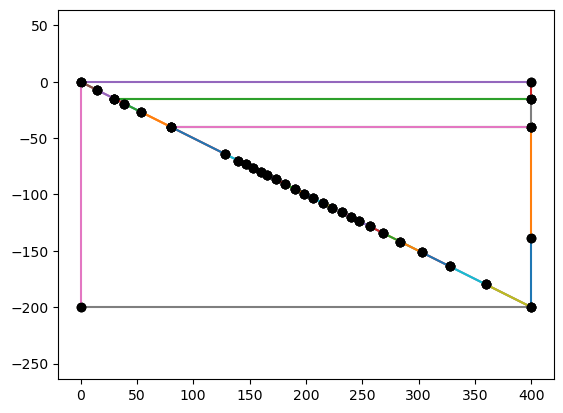

In [78]:
geom = geo.SubductionGeometry(slab, slab_rid=1, wedge_rid=2, 
                                    slab_side_sid=2, wedge_side_sid=3, slab_base_sid=7, 
                                    wedge_base_sid=8, coast_sid=11, top_sid=12,
                                    wedge_top_res=4*minres, slab_base_res=6*minres)
geom.plot()

In [79]:
geom.addcrustlayer?

Signature:
geom.addcrustlayer(
    depth,
    name,
    sid=None,
    rid=None,
    slab_res=None,
    side_res=None,
    slab_sid=None,
    side_sid=None,
)
Docstring: Add a crustal layer to the subduction geometry.
File:      ~/Documents/Fenicsx-subduction/python/geometry.py
Type:      method

['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']
8


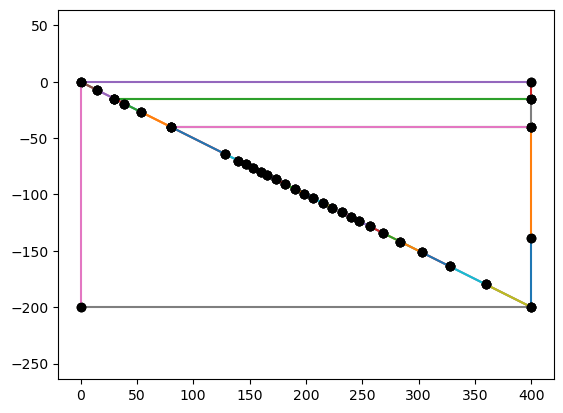

In [80]:
geom.addcrustlayer(40, "LowerCrust", sid=9, rid=3, slab_res=6*minres, side_res=16*minres, slab_sid=13, side_sid=5)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
print(len(slab.points))
geom.plot()


In [81]:
geom.writegeofile('benchmark1layer.geo_unrolled')

Info    : Writing 'benchmark1layer.geo_unrolled'...


Info    : Done writing 'benchmark1layer.geo_unrolled'


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


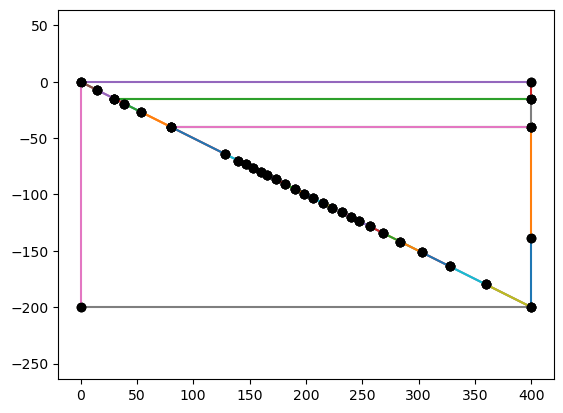

In [82]:
geom.addcrustlayer(15,"UpperCrust", sid=10, rid=4, slab_res= 2*minres, side_res=4*minres, side_sid=6)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
geom.plot()


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


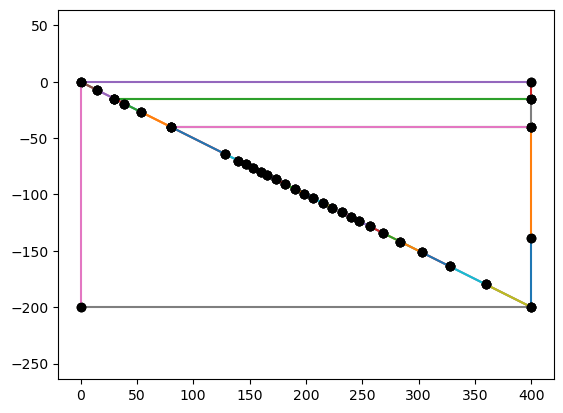

In [83]:
geom.addwedgesidepoint(139, "WedgeSide::InOut", line_name="UpperWedgeSide", res=4*minres, sid=4)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


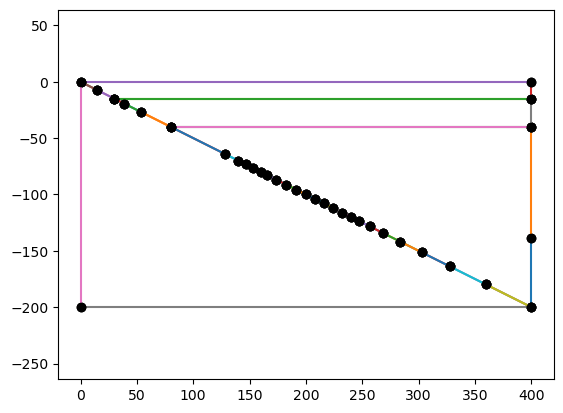

In [84]:
geom.addslabpoint(100, "Slab::DetectorPoint", res=1*minres)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


In [85]:
geom.writegeofile('benchmark.geo_unrolled')

Info    : Writing 'benchmark.geo_unrolled'...
Info    : Done writing 'benchmark.geo_unrolled'


In [86]:
mesh, ct, ft = geom.generatemesh()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 20%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 30%] Meshing curve 11 (Line)
Info    : [ 30%] Meshing curve 12 (Line)
Info    : [ 40%] Meshing curve 13 (Line)
Info    : [ 40%] Meshing curve 14 (Line)
Info    : [ 40%] Meshing curve 15 (Line)
Info    : [ 50%] Meshing curve 16 (Line)
Info    : [ 50%] Meshing curve 17 (Line)
Info    : [ 50%] Meshing curve 18 (Line)
Info    : [ 50%] Meshing curve 19 (Line)
Info    : [ 60%] Meshing curve 20 (Line)
Info    : [ 60%] Meshing curve 21 (Line)
Info    : [ 60%] Meshing curve 22 (Line)
Info    : [ 60%] Meshing curve 23 (Line)
Info    : [ 70%] Meshing curve 24 (Line)
I


No module named 'trame'

Falling back to a static output.
  warnings.warn(



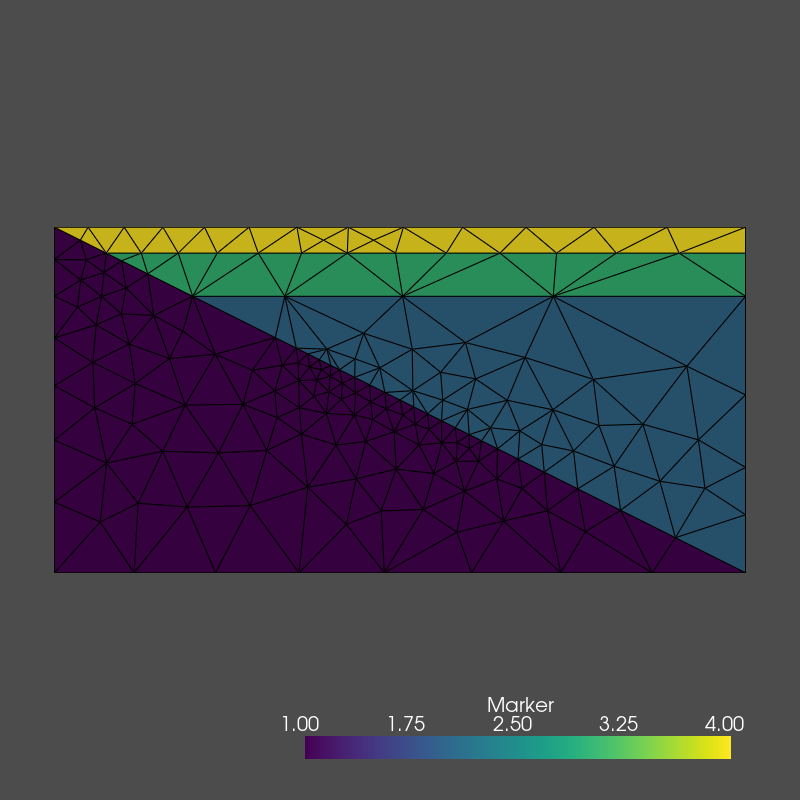

In [87]:
import pyvista
pyvista.start_xvfb()
from dolfinx.plot import create_vtk_mesh
topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
grid.set_active_scalars("Marker")

p = pyvista.Plotter(window_size=[800, 800])
p.add_mesh(grid, show_edges=True)
p.view_xy()
p.show()

In [88]:
import dolfinx
import numpy as np
import ufl
from dolfinx.fem import Function, FunctionSpace, dirichletbc, locate_dofs_geometrical, locate_dofs_topological, form

Ps2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Ps1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
Ve = FunctionSpace(mesh, Ps2)
Pe = FunctionSpace(mesh, Ps1)
THs = Ps2 * Ps1
Vs = FunctionSpace(mesh, THs)

(v_as, p_as) = ufl.TrialFunctions(Vs)
(v_ts, p_ts) = ufl.TestFunctions(Vs)

Vs0, _ = Vs.sub(0).collapse()
Vs00, _ = Vs0.sub(0).collapse()
Vs01, _ = Vs0.sub(1).collapse()
Vs1, _ = Vs.sub(1).collapse()

Pw2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Pw1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
Vwe = FunctionSpace(mesh, Pw2)
Pwe = FunctionSpace(mesh, Pw1)
THw = Pw2 * Pw1
Vw = FunctionSpace(mesh, THw)

(v_aw, p_aw) = ufl.TrialFunctions(Vw)
(v_tw, p_tw) = ufl.TestFunctions(Vw)

Vw0, _ = Vw.sub(0).collapse()
Vw00, _ = Vw0.sub(0).collapse()
Vw01, _ = Vw0.sub(1).collapse()
Vw1, _ = Vw.sub(1).collapse()


Vt = FunctionSpace(mesh, (ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)))
T_a = ufl.TrialFunction(Vt)
T_t = ufl.TestFunction(Vt)



In [89]:
slab_surface_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 1, np.concatenate((ft.find(1), ft.find(13))))


In [90]:
slab_surface_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 1, np.concatenate((ft.find(1), ft.find(13))))


In [91]:
All_except_slab_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [92]:
NonSlab_dofs_Vs0_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs0[0]) if dof not in slab_surface_dofs_Vs0[0]]
NonSlab_dofs_Vs0 = [All_except_slab_dofs_Vs0[i][NonSlab_dofs_Vs0_indices] for i in range(len(All_except_slab_dofs_Vs0))]

In [93]:
All_except_slab_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [94]:
NonSlab_dofs_Vs1_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs1[0]) if dof not in slab_surface_dofs_Vs1[0]]
NonSlab_dofs_Vs1 = [All_except_slab_dofs_Vs1[i][NonSlab_dofs_Vs1_indices] for i in range(len(All_except_slab_dofs_Vs1))]

In [95]:
slab_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(1))

In [96]:
slab_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(1))

In [97]:
upperWedge_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(9))

In [98]:
upperWedge_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(9))

In [99]:
All_except_wedge_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [100]:
NonWedge_dofs_Vw0_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw0[0]) if dof not in slab_surface_dofs_Vw0[0]]
NonWedge_dofs_Vw0 = [All_except_wedge_dofs_Vw0[i][NonWedge_dofs_Vw0_indices] for i in range(len(All_except_wedge_dofs_Vw0))]


In [101]:
All_except_wedge_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [102]:
NonWedge_dofs_Vw1_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw1[0]) if dof not in slab_surface_dofs_Vw1[0]]
NonWedge_dofs_Vw1 = [All_except_wedge_dofs_Vw1[i][NonWedge_dofs_Vw1_indices] for i in range(len(All_except_wedge_dofs_Vw1))]
NonWedge_dofs_Vw1[0].size

126

In [103]:
NonWedgeTop_dofs_Vw1_indices = [i for i, dof in enumerate(NonWedge_dofs_Vw1[0]) if dof not in upperWedge_surface_dofs_Vw1[0]]
NonWedgeTop_dofs_Vw1 = [NonWedge_dofs_Vw1[i][NonWedgeTop_dofs_Vw1_indices] for i in range(len(NonWedge_dofs_Vw1))]
NonWedgeTop_dofs_Vw1[0].size

122

In [104]:
Backarc_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, np.concatenate((ft.find(4), ft.find(5), ft.find(6))))

In [105]:
top_surface_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(12))

In [106]:
Trench_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(2))

In [107]:
import scipy
zd = 97
Ts = 0
Tm = 1350
kc = 0.8064516
erf = scipy.special.erf
H1=0.419354
H2=0.087097
qs=2096774
z1=-15
z2=-40
kc=0.8064516
km=1
q1 = qs-(H1*z1)
q2=q1-H2*(z2-z1)



In [108]:
Ttop = Function(Vt)
Ttop.x.set(0.0)
bc_Ttop = dirichletbc(Ttop, top_surface_dofs_Vt)

In [109]:
def T_l(x):
    return Tm*erf(-x[1]/zd) 
TLeft = Function(Vt)
TLeft.interpolate(T_l)
bc_trench_Vt = dirichletbc(TLeft, Trench_dofs_Vt)

In [110]:

def T_backarc(values):
    Tbackarc = np.empty(values.shape[1])
    for i in range(values.shape[1]):
        x = values[:,i]
        if -x[1] >= -15:
            Tbackarc[i] = Ts-(H1*(-x[1]**2)/(2*kc))+(-x[1]*(qs/kc))
        elif -40 < x[1] < -15:
             Tbackarc[i] = ((Ts-(H1*(z1**2)/(2*kc))+((qs/kc)*z1))-(H2*(-x[1]-z1)/2*kc)+(q1*(-x[1]-z1)))
        else:
             Tbackarc[i] = min(Tm,((Ts-(H1*(z2**2)/(2*kc))+((qs/kc)*z2))+q2*(-x[1]-z2)/km))
        #else:
            #TBackarc=Tm
        
    return Tbackarc
TBackarc = Function(Vt)
TBackarc.interpolate(T_l)


bc_backarc_Vt = dirichletbc(TBackarc, Backarc_dofs_Vt)

In [111]:
TBackarc.x.array

array([ 1.34521210e+03,  1.34521210e+03,  1.33621440e+03,  1.34176214e+03,
        1.34176214e+03,  1.34521210e+03,  1.32740121e+03,  1.33228710e+03,
        1.33926598e+03,  1.32716618e+03,  1.33219250e+03,  1.33920540e+03,
        1.31319886e+03,  1.32714158e+03,  1.32105046e+03,  1.26627445e+03,
        1.28498670e+03,  1.28476735e+03,  1.28487710e+03,  1.27600145e+03,
        1.27612342e+03,  1.30453535e+03,  1.26694441e+03,  1.27630426e+03,
        1.29540590e+03,  1.28810903e+03,  1.28187713e+03,  1.31280396e+03,
        1.30884773e+03,  1.29931763e+03,  1.29417329e+03,  1.33222383e+03,
        1.32089045e+03,  1.32406451e+03,  1.32993988e+03,  1.29764125e+03,
        1.30577631e+03,  1.31518898e+03,  1.34057015e+03,  1.33812630e+03,
        1.33343355e+03,  1.34238362e+03,  1.32090488e+03,  1.30600597e+03,
        1.25661397e+03,  1.27186524e+03,  1.26155290e+03,  1.25346965e+03,
        1.27038766e+03,  1.26005957e+03,  1.31493838e+03,  1.30183583e+03,
        1.30192072e+03,  


No module named 'trame'

Falling back to a static output.
  warnings.warn(



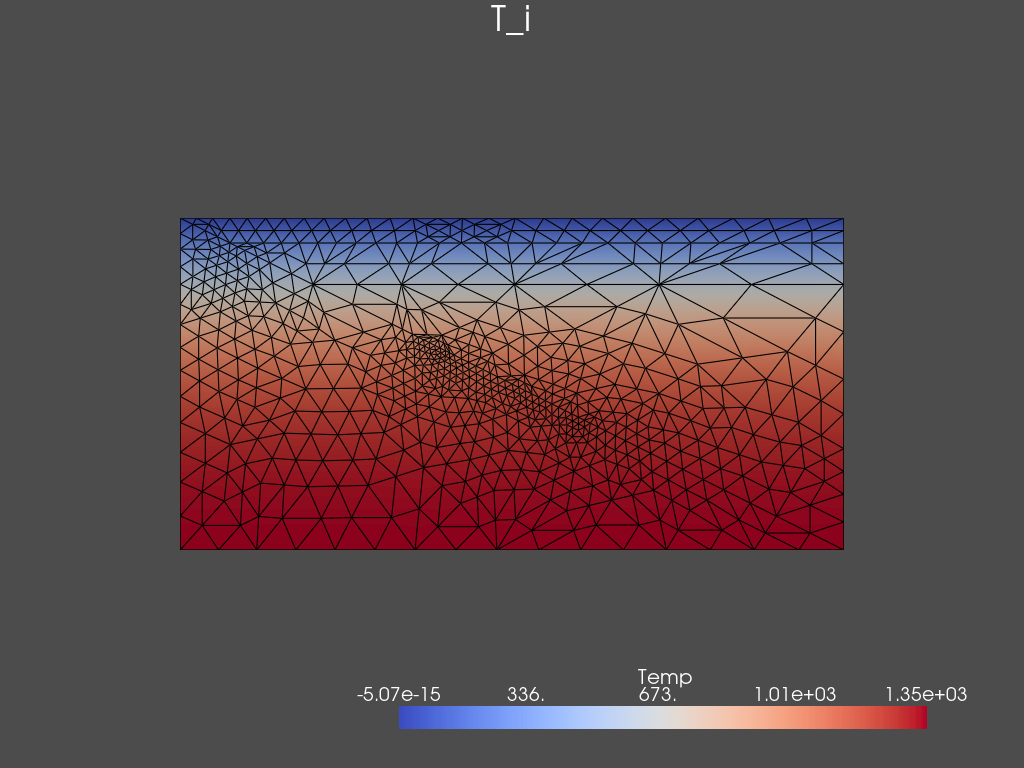

In [112]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
pyvista_cells, cell_types, geometry = create_vtk_mesh(TBackarc.function_space)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temp"] = TBackarc.x.array
grid.set_active_scalars("Temp")

plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=True, cmap = 'coolwarm')
plotter.view_xy()

if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("Temp.pdf")

In [113]:
zero_vs = Function(Vs0)
zero_vs.x.set(0.0)
bc_NonSlab_Vs0 = dirichletbc(zero_vs, NonSlab_dofs_Vs0, Vs.sub(0))


In [114]:
zero_ps = Function(Vs1)
zero_ps.x.set(0.0)
bc_NonSlab_Vs1 = dirichletbc(zero_ps, NonSlab_dofs_Vs1, Vs.sub(1))


In [115]:
zero_v = Function(Vw0)
zero_v.x.set(0.0)
bc_WedgeTop = dirichletbc(zero_v, upperWedge_surface_dofs_Vw0, Vw.sub(0))


In [116]:
zero_vw = Function(Vw0)
zero_vw.x.set(0.0)
bc_NonWedge_Vw0 = dirichletbc(zero_vw, NonWedge_dofs_Vw0, Vw.sub(0))


In [117]:
zero_pw = Function(Vw1)
zero_pw.x.set(0.0)
bc_NonWedgeTop_Vw1 = dirichletbc(zero_pw, NonWedgeTop_dofs_Vw1, Vw.sub(1))


In [118]:
from petsc4py.PETSc import ScalarType
vo = 0.023716

def slab_velocity_s(values):
    return_values = np.empty((2,values.shape[1]))
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = 0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_s = Function(Vs0)
Vslab_s.interpolate(slab_velocity_s)
bc_slab_s = dirichletbc(Vslab_s, slab_surface_dofs_Vs0, Vs.sub(0))


In [119]:
Vslab_s.x.array

array([ 3.77140829, -1.88570415,  3.77140829, ..., -1.88570415,
        3.77140829, -1.88570415])

In [120]:

def slab_velocity_w(values):
    return_values = np.empty((2,values.shape[1]))
    cd = 80.0
    vo = 0.023716
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = min(max(-(x[1]+cd)/2.5, 0.0), 1.0)*0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_w = Function(Vw0)
Vslab_w.interpolate(slab_velocity_w)
bc_slab_w = dirichletbc(Vslab_w, slab_surface_dofs_Vw0, Vw.sub(0))


In [121]:
ds = ufl.Measure('ds', domain=mesh, subdomain_data=ft)
dx = ufl.Measure("dx", domain=mesh, subdomain_data=ct)

In [122]:
from petsc4py.PETSc import ScalarType

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Ks = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*ufl.sym(ufl.grad(v_as)))*dx(1) + zero_c*ufl.inner(v_ts, v_as)*dx
Gs = -ufl.div(v_ts)*p_as*dx(1)
Ds = -p_ts*ufl.div(v_as)*dx(1)
Ss = Ks + Gs + Ds + zero_c*p_ts*p_as*dx

#Ss = ufl.inner(v_ts, v_as)*ufl.dx + p_ts*p_as*ufl.dx

fs = zero_c * v_ts[0] * dx(1)
problem_vs = dolfinx.fem.petsc.LinearProblem(Ss, fs, bcs=[bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
vs_i = problem_vs.solve()

In [123]:
from dolfinx import io
vs = vs_i.sub(0).collapse()
#v = Vslab_s
vs.name = "Velocity"
ps = vs_i.sub(1).collapse()
ps.name = "Pressure"

with io.VTKFile(mesh.comm, "output_v.pvd", "w") as vtk:
    vtk.write_function([vs], 0.0)
with io.VTKFile(mesh.comm, "output_p.pvd", "w") as vtk:
    vtk.write_function([ps], 0.0)

In [124]:
vs.x.array

array([ 3.77140829, -1.88570415,  3.77140829, ..., -1.88570415,
        0.        ,  0.        ])


No module named 'trame'

Falling back to a static output.
  warnings.warn(



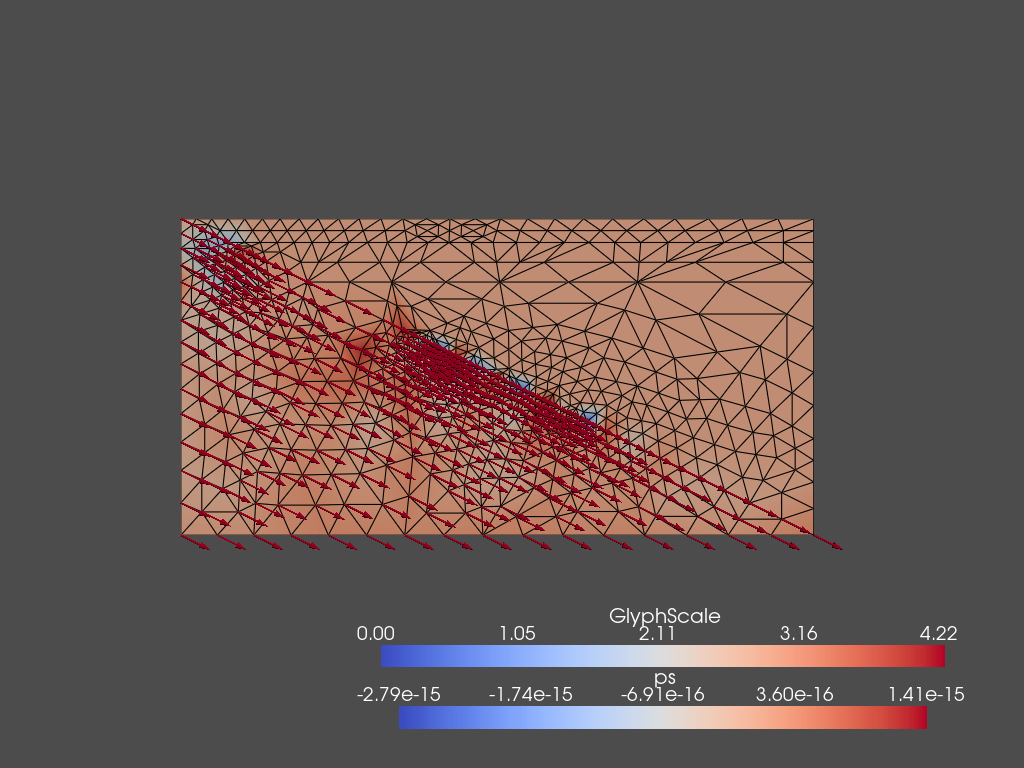

In [125]:
import pyvista
from dolfinx.plot import create_vtk_mesh
import matplotlib.pyplot as plt

pyvista.start_xvfb()
topologys, cell_types_s, geometrys = create_vtk_mesh(Vs0)
values_s = np.zeros((geometrys.shape[0], 3), dtype=np.float64)
values_s[:, :len(vs)] = vs.x.array.real.reshape((geometrys.shape[0], len(vs)))

# Create a point cloud of glyphs
function_grids = pyvista.UnstructuredGrid(topologys, cell_types_s, geometrys)
function_grids["vs"] = values_s
glyphs_s = function_grids.glyph(orient="vs", factor=5)

# create a scalar field on the P2 element
p_p2s = Function(Vs00)
# and interpolate the pressure onto it
p_p2s.interpolate(ps)
# then put that pressure onto the function_grid
function_grids["ps"] = p_p2s.x.array.real
function_grids.set_active_scalars("ps")

# Create plotter
plotter = pyvista.Plotter()
plotter.add_mesh(function_grids, show_edges=True, cmap='coolwarm')
plotter.add_mesh(glyphs_s, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    plotter.savefig('Vel_Pressurefield2.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [126]:
zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Kw = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*ufl.sym(ufl.grad(v_aw)))*dx(2) + zero_c*ufl.inner(v_tw, v_aw)*dx
Gw = -ufl.div(v_tw)*p_aw*dx(2)
Dw = -p_tw*ufl.div(v_aw)*dx(2)
Sw = Kw + Gw + Dw + zero_c*p_tw*p_aw*dx

#Sw = ufl.inner(v_tw, v_aw)*dx + p_tw*p_aw*dx


fw = zero_c * (v_tw[0] + v_tw[1] + p_tw) * dx(2)
problem_vw = dolfinx.fem.petsc.LinearProblem(Sw, fw, bcs=[bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
vw_i = problem_vw.solve()

In [127]:
vw_i.sub(0).x.array

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
from dolfinx import io
vw = vw_i.sub(0).collapse()
#vw = Vslab_w
vw.name = "Velocityw"
pw = vw_i.sub(1).collapse()
pw.name = "Pressurew"

with io.VTKFile(mesh.comm, "output_vw.pvd", "w") as vtk:
    vtk.write_function([vw], 0.0)
with io.VTKFile(mesh.comm, "output_pw.pvd", "w") as vtk:
    vtk.write_function([pw], 0.0)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



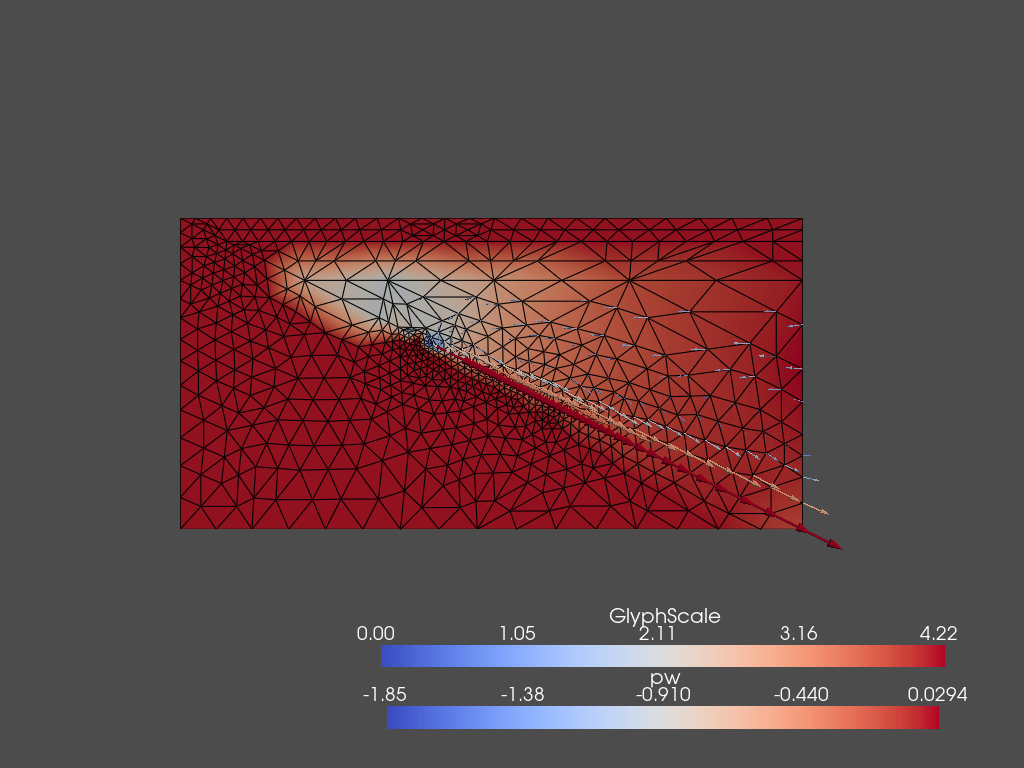

In [129]:
import pyvista
from dolfinx.plot import create_vtk_mesh
import matplotlib.pyplot as plt

pyvista.start_xvfb()
topologyw, cell_typesw, geometryw = create_vtk_mesh(Vw0)
valuesw = np.zeros((geometryw.shape[0], 3), dtype=np.float64)
valuesw[:, :len(vw)] = vw.x.array.real.reshape((geometryw.shape[0], len(vw)))

# Create a point cloud of glyphs
function_gridw = pyvista.UnstructuredGrid(topologyw, cell_typesw, geometryw)
function_gridw["vw"] = valuesw
glyphsw = function_gridw.glyph(orient="vw", factor=7)

# create a scalar field on the P2 element
p_p2w = Function(Vw00)
# and interpolate the pressure onto it
p_p2w.interpolate(pw)
# then put that pressure onto the function_grid
function_gridw["pw"] = p_p2w.x.array.real
function_gridw.set_active_scalars("pw")

# Create plotter
plotter = pyvista.Plotter()
plotter.add_mesh(function_gridw, show_edges=True, cmap='coolwarm')
plotter.add_mesh(glyphsw, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    plotter.savefig('Vel_Pressurefield2.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [130]:

S1 =  (T_t*dot(vs_i.sub(0), grad(T_a))+inner(grad(T_a), grad(T_t)))*dx(1)


In [131]:

S2 =  (T_t*dot(vw_i.sub(0), grad(T_a))+inner(grad(T_a), grad(T_t)))*dx(2)


In [132]:

S3 =  (inner(grad(T_a), grad(T_t)))*dx(3)


In [133]:

S4 =  (inner(grad(T_a), grad(T_t)))*dx(4)


In [134]:
St=S1+S2+S3+S4
ft = T_t*H1*dx(4) + T_t*H2*dx(3)

problem_T = LinearProblem(St, ft, bcs=[bc_Ttop, bc_trench_Vt, bc_backarc_Vt], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
T_i = problem_T.solve()

INFO:root:running build_ext
INFO:root:building 'libffcx_forms_3d0ba51f66ed29b8f5fac135fda69463288a1940' extension
INFO:root:clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/kteshome/anaconda3/envs/fenicsx2-env/include -arch arm64 -fPIC -O2 -isystem /Users/kteshome/anaconda3/envs/fenicsx2-env/include -arch arm64 -I/Users/kteshome/anaconda3/envs/fenicsx2-env/lib/python3.10/site-packages/ffcx/codegeneration -I/Users/kteshome/anaconda3/envs/fenicsx2-env/include/python3.10 -c libffcx_forms_3d0ba51f66ed29b8f5fac135fda69463288a1940.c -o ./libffcx_forms_3d0ba51f66ed29b8f5fac135fda69463288a1940.o -O2 -g0
INFO:root:clang -bundle -undefined dynamic_lookup -Wl,-rpath,/Users/kteshome/anaconda3/envs/fenicsx2-env/lib -L/Users/kteshome/anaconda3/envs/fenicsx2-env/lib -Wl,-rpath,/Users/kteshome/anaconda3/envs/fenicsx2-env/lib -L/Users/kteshome/anaconda3/envs/fenicsx2-env/lib ./libffcx_forms_3d0ba51f66ed29b8f5fac135fda69463288a1940.o -o ./li

In [135]:
T_i.x.array

array([7.52652931e+02, 4.17693976e+02, 3.54342262e+02, 3.97978351e+02,
       5.57901136e+02, 5.75826351e+02, 3.44428863e+02, 3.53853869e+02,
       5.46038204e+02, 4.93033495e+02, 3.12981442e+02, 3.25402314e+02,
       4.83491043e+02, 3.14879416e+02, 3.02087439e+02, 2.73883344e+02,
       3.07647407e+02, 2.51264996e+02, 2.73106921e+02, 2.63732947e+02,
       2.57571282e+02, 2.96173904e+02, 4.71088389e+02, 3.08704429e+02,
       2.77825533e+02, 2.86751563e+02, 4.74399134e+02, 2.82706288e+02,
       2.89607772e+02, 3.11271078e+02, 2.91368254e+02, 5.81710115e+02,
       3.16858383e+02, 4.22178233e+02, 4.55029741e+02, 4.79171193e+02,
       3.10673551e+02, 2.99433329e+02, 6.79614651e+02, 5.02533696e+02,
       5.01387404e+02, 3.31999088e+02, 4.95982694e+02, 4.88459853e+02,
       2.62263549e+02, 2.57076943e+02, 2.70579158e+02, 4.66850542e+02,
       3.10849111e+02, 3.48476825e+02, 5.06895162e+02, 3.60148149e+02,
       4.04290685e+02, 4.77327584e+02, 4.75755826e+02, 3.87271059e+02,
      


No module named 'trame'

Falling back to a static output.
  warnings.warn(



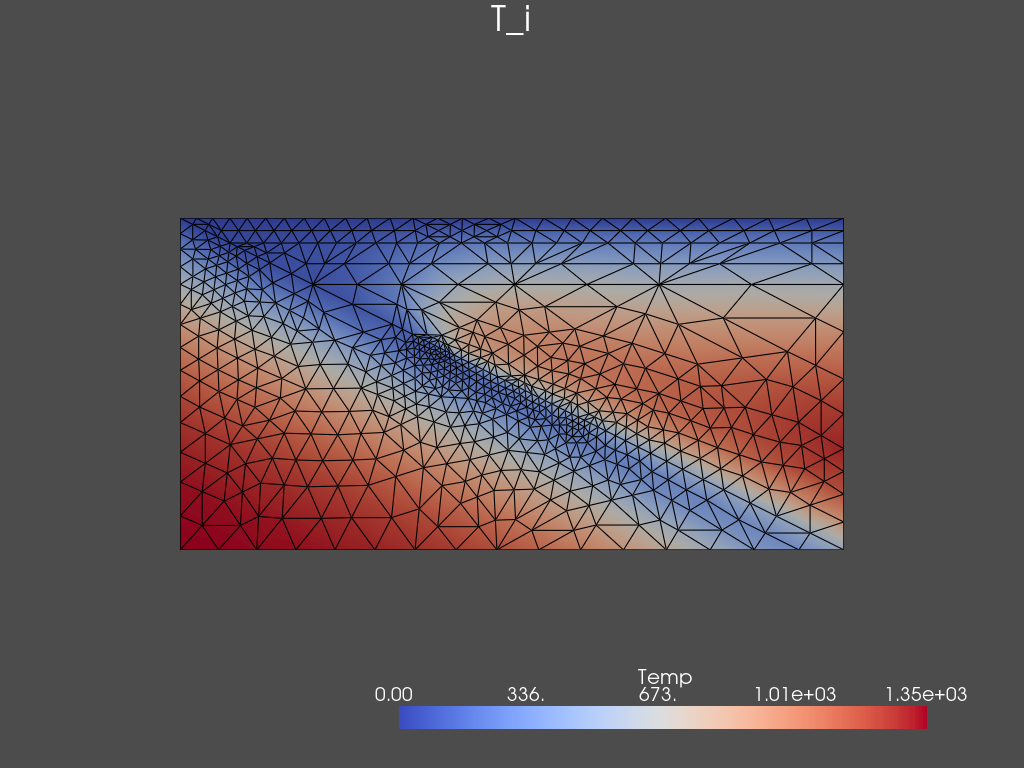

In [136]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
pyvista_cells, cell_types, geometry = create_vtk_mesh(T_i.function_space)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temp"] = T_i.x.array
grid.set_active_scalars("Temp")

plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=True, cmap = 'coolwarm')
plotter.view_xy()

if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("Temp.pdf")

In [ ]:
# Slab
pyvista.start_xvfb()
topologys, cell_types_s, geometrys = create_vtk_mesh(Vs0)
values_s = np.zeros((geometrys.shape[0], 3), dtype=np.float64)
values_s[:, :len(vs)] = vs.x.array.real.reshape((geometrys.shape[0], len(vs)))

function_grids = pyvista.UnstructuredGrid(topologys, cell_types_s, geometrys)
function_grids["vs"] = values_s
glyphs_s = function_grids.glyph(orient="vs", factor=7)

#Wedge
pyvista.start_xvfb()
topologyw, cell_typesw, geometryw = create_vtk_mesh(Vw0)
valuesw = np.zeros((geometryw.shape[0], 3), dtype=np.float64)
valuesw[:, :len(vw)] = vw.x.array.real.reshape((geometryw.shape[0], len(vw)))

function_gridw = pyvista.UnstructuredGrid(topologyw, cell_typesw, geometryw)
function_gridw["vw"] = valuesw
glyphsw = function_gridw.glyph(orient="vw", factor=7)

glyphs = glyphsw+glyphs_s
#Scalar field at T=0
#T_tr = zero_c

pyvista_cells, cell_types, geometry = create_vtk_mesh(Vt)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temperature"] = T_i
grid.set_active_scalars("Temperature")
plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=True, cmap = 'coolwarm')

plotter.add_mesh(glyphs, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
     plotter.show()
else:
    glyphs = plotter.screenshot('glyphs.pdf', format='pdf')